# 第一题 第一问解得解析解为$T(x,t) = 50sin(\pi x)e^{-0.06 \pi^2 t}$

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
0.15
0.3
0.44999999999999996


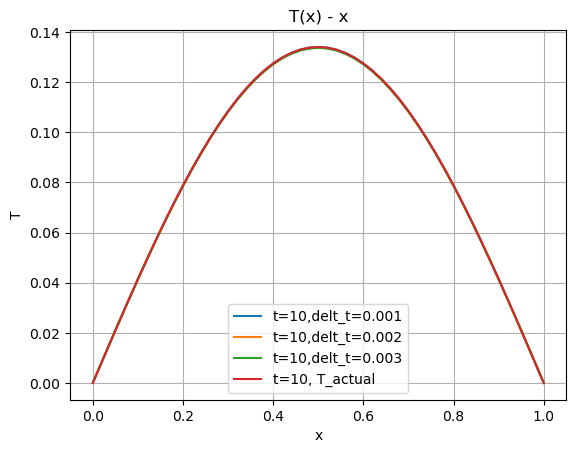

In [202]:
import numpy as np
import matplotlib.pyplot as plt

# 生成序列
X = np.arange(0., 1.02, 0.02)
print(X)

T0 = 50 * np.sin((np.pi) * X) #初始值
T_actual = T0 * np.exp(-0.06 * np.pi**2 * 10) #解析解

def diedai(T0, delt_t, delt_x=0.02, a = 0.06):
    Ts = T0[:] # 前一次的值
    Te = np.zeros(51,dtype = np.float64) # 下一次的值，先赋值为0
    
    cishu = int(10/delt_t) # 迭代次数
    r = (a * delt_t) /(delt_x * delt_x)
    print(r)
    for itime in range(1, cishu+1): 
        Te[0] = 0
        Te[50] = 0
        for i in range(1,50): #给序号1的元素到序号49的元素赋值
            Te[i] = Ts[i] + r * (Ts[i+1] - 2*Ts[i] + Ts[i-1])
        Ts = Te.copy()
        
    return Te


T1 = diedai(T0, delt_t = 0.001)
T2 = diedai(T0, delt_t = 0.002)
T3 = diedai(T0, delt_t = 0.003)

# r > 0.5 时结果不稳定,即delt_t>0.3333··时不稳定
# T6 = diedai(T0, delt_t = 0.001)
# T7 = diedai(T0, delt_t = 0.0005)
# T8 = diedai(T0, delt_t = 0.00025)
# plt.plot(X, T0, label="t=0")
plt.plot(X, T1, label="t=10,delt_t=0.001")
plt.plot(X, T2, label="t=10,delt_t=0.002")
plt.plot(X, T3, label="t=10,delt_t=0.003")



# plt.plot(X, T6, label="t=10,delt_t=0.001")
# plt.plot(X, T7, label="t=10,delt_t=0.0005")
# plt.plot(X, T8, label="t=10,delt_t=0.00025")

plt.plot(X, T_actual, label="t=10, T_actual") #解析解

# 添加图例
plt.legend()

# 添加标签和标题
plt.xlabel("x")
plt.ylabel("T")
plt.title("T(x) - x")

# 显示网格和图例
plt.grid(True)


# 显示图像
plt.show()


    

## 观察到$\Delta t$越大温度越低$\Delta t$越小温度越高，越接近解析解

# 第二题 解析解为$u(x,t) = \begin{cases} u_0(x-t), & x-t \geq 0 \\0, & x < 0\end{cases}$

## 第一种差分结果很不稳定

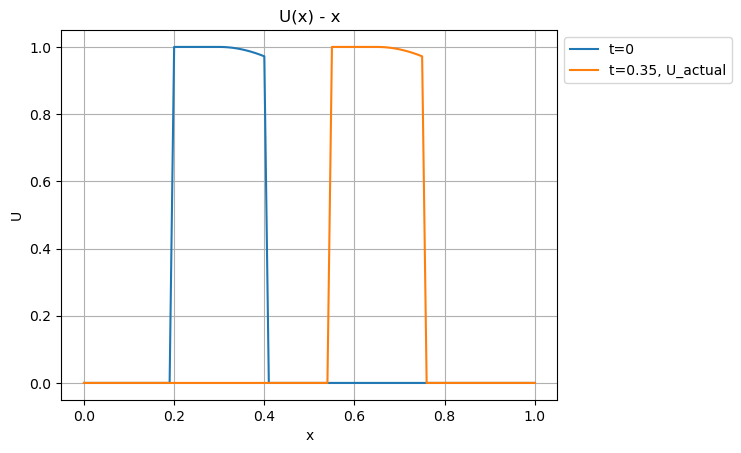

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def u_0(X):
    U = np.zeros(101, dtype = np.float64)
    for i in range(0, 100):
        if X[i] < 0.2:
            U[i] = 0
        elif 0.2 <= X[i] <= 0.3:
            U[i] = 1
        elif 0.3 < X[i] <= 0.4:
            U[i] = 2*(X[i]-0.3)**3 - 3*(X[i]-0.3)**2 + 1
        elif X[i] > 0.4:
            U[i] = 0

    return U

X = np.arange(0., 1.01, 0.01)
U0 = u_0(X) #初始值
U_actual = u_0(X-0.35) #t = 0.35的解析解

def diedai2(U0, delt_t, delt_x=0.01):
    CFL = delt_t/delt_x
    Us = U0[:] # 前一次的值
    Ue = np.zeros(101,dtype = np.float64) # 下一次的值，先赋值为0
    
    cishu = int(0.35/delt_t) # 迭代次数
    for itime in range(1, cishu+1): 
        Ue[0] = 0
        Ue[100] = 0
        for i in range(1,100): #给序号1的元素到序号99的元素赋值,range左闭右开！
            Ue[i] = Us[i] - CFL * (Us[i+1] - Us[i-1]) #选择前向时间差分（FTD）和中心空间差分（BWD）
        Us = Ue.copy()
    return Ue

# 用这种方式迭代时，需要CFL<<1时才稳定也就是delt_t<<0.01
# U1 = diedai2(U0, delt_t = 0.08)
# U2 = diedai2(U0, delt_t = 0.01)
# U3 = diedai2(U0, delt_t = 0.03)
# U4 = diedai2(U0, delt_t = 0.009)
# U5 = diedai2(U0, delt_t = 0.003)
# U6 = diedai2(U0, delt_t = 0.0001)
# U7 = diedai2(U0, delt_t = 0.00001)



plt.plot(X, U0, label="t=0")

# plt.plot(X, U1, label="t=0.35, delt_t = 0.08, CFL = 0")
# plt.plot(X, U2, label="t=0.35, delt_t = 0.01, CFL = 1")
# plt.plot(X, U3, label="t=0.35, delt_t = 0.03, CFL = 0.4")
# plt.plot(X, U4, label="t=0.35, delt_t = 0.009, CFL = 0.9")
# plt.plot(X, U5, label="t=0.35, delt_t = 0.003, CFL = 0.3")
# plt.plot(X, U6, label="t=0.35, delt_t = 0.0001, CFL = 0.01")
# plt.plot(X, U7, label="t=0.35, delt_t = 0.00001, CFL = 0.001")

plt.plot(X, U_actual, label="t=0.35, U_actual") #解析解
# 显示网格
plt.grid(True)

# 添加图例
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# 添加标签和标题
plt.xlabel("x")
plt.ylabel("U")
plt.title("U(x) - x")

# 显示图像
plt.show()

## 第二种好点

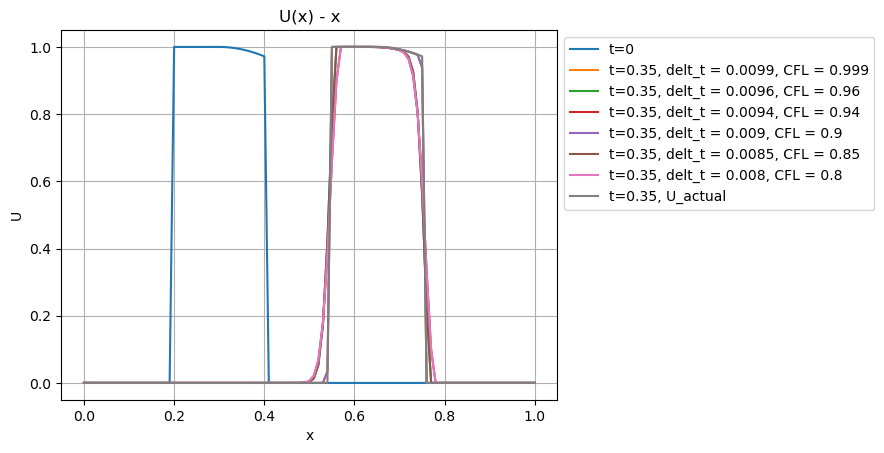

In [224]:
import numpy as np
import matplotlib.pyplot as plt

def u_0(X):
    U = np.zeros(101, dtype = np.float64)
    for i in range(0, 100):
        if X[i] < 0.2:
            U[i] = 0
        elif 0.2 <= X[i] <= 0.3:
            U[i] = 1
        elif 0.3 < X[i] <= 0.4:
            U[i] = 2*(X[i]-0.3)**3 - 3*(X[i]-0.3)**2 + 1
        elif X[i] > 0.4:
            U[i] = 0

    return U

X = np.arange(0., 1.01, 0.01)
U0 = u_0(X) #初始值
U_actual = u_0(X-0.35) #t = 0.35的解析解

def diedai2(U0, delt_t, delt_x=0.01):
    CFL = delt_t / delt_x
    Us = U0[:] # 前一次的值
    
    Ue = np.zeros(101,dtype = np.float64) # 下一次的值，先赋值为0
    cishu = int(0.35/delt_t) # 迭代次数
    for itime in range(1, cishu+1): 
        Ue[0] = 0
        Ue[100] = 0
        for i in range(1,100): #给序号1的元素到序号100的元素赋值,range左闭右开！
            Ue[i] = Us[i] - CFL * (Us[i] - Us[i-1]) #选择前向时间差分（FTD）和后向空间差分（BWD）,我嘞个去试了好几种差分方法，最后查了这个方程的物理意义才确定这个差分！但好像与有限体积法结果一样。
        Us = Ue.copy()
    return Ue

# 需要CFL<1时才稳定也就是delt_t<0.01, 越靠近1越接近解析解
U11 = diedai2(U0, delt_t = 0.00999)
U12 = diedai2(U0, delt_t = 0.0096)
U13 = diedai2(U0, delt_t = 0.0094)
U14 = diedai2(U0, delt_t = 0.009)
U15 = diedai2(U0, delt_t = 0.0085)
U16 = diedai2(U0, delt_t = 0.008)
# U1 = diedai2(U0, delt_t = 0.007)
# U2 = diedai2(U0, delt_t = 0.006)
# U3 = diedai2(U0, delt_t = 0.005)
# U4 = diedai2(U0, delt_t = 0.001)
# U5 = diedai2(U0, delt_t = 0.0005)
# U6 = diedai2(U0, delt_t = 0.0001)
# U7 = diedai2(U0, delt_t = 0.00001)

plt.plot(X, U0, label="t=0")
plt.plot(X, U11, label="t=0.35, delt_t = 0.0099, CFL = 0.999")
plt.plot(X, U12, label="t=0.35, delt_t = 0.0096, CFL = 0.96")
plt.plot(X, U13, label="t=0.35, delt_t = 0.0094, CFL = 0.94")
plt.plot(X, U11, label="t=0.35, delt_t = 0.009, CFL = 0.9")
plt.plot(X, U12, label="t=0.35, delt_t = 0.0085, CFL = 0.85")
plt.plot(X, U13, label="t=0.35, delt_t = 0.008, CFL = 0.8")
# plt.plot(X, U4, label="t=0.35, delt_t = 0.007, CFL = 0.7")
# plt.plot(X, U5, label="t=0.35, delt_t = 0.0006, CFL = 0.6")
# plt.plot(X, U3, label="t=0.35, delt_t = 0.005, CFL = 0.5")
# plt.plot(X, U4, label="t=0.35, delt_t = 0.001, CFL = 0.1")
# plt.plot(X, U5, label="t=0.35, delt_t = 0.0005, CFL = 0.05")
# plt.plot(X, U6, label="t=0.35, delt_t = 0.0001, CFL = 0.01")



plt.plot(X, U_actual, label="t=0.35, U_actual") #解析解
# 显示网格
plt.grid(True)

# 添加图例
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# 添加标签和标题
plt.xlabel("x")
plt.ylabel("U")
plt.title("U(x) - x")

# 显示图像
plt.show()